In [1]:
import xarray as xr 

In [2]:
import cartopy.crs as ccrs

In [3]:
import cartopy.feature as cfeature

In [4]:
import matplotlib.pyplot as plt

In [5]:
rainfall_data = xr.open_dataset("RRavgclim.nc")
rainfall_data


<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 20, lat: 32)
Coordinates:
  * time       (time) datetime64[ns] 2016-06-16
  * lon        (lon) float64 -3.375 -3.125 -2.875 -2.625 ... 0.875 1.125 1.375
  * lat        (lat) float64 11.88 11.62 11.38 11.12 ... 4.875 4.625 4.375 4.125
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/21)
    CDI:                       Climate Data Interface version 1.9.3 (http://m...
    Conventions:               CF-1.4
    history:                   Sun Feb 14 17:35:05 2021: cdo yearsum ymmeancl...
    institution:               Deutscher Wetterdienst
    title:                     GPCC Full Data Monthly Product Version 2018, p...
    summary:                   The Full Data Monthly Product is of much highe...
    ...                        ...
    geospatial_lat_min:        -90.
    geospatial_lat_max:        90.
    geospatial_lon_min:        -180.
    geospatial_lon_max:        180.
    frequency:                 year
    CDO:                       Climate Data Operators version 1.9.3 (http://m...

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
precip=rainfall_data.precip
precip

<xarray.DataArray 'precip' (time: 1, lat: 32, lon: 20)>
array([[[849.98804, 852.9561 , ..., 767.81525, 786.5839 ],
        [885.76276, 875.79663, ..., 847.1322 , 844.5089 ],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-06-16
  * lon      (lon) float64 -3.375 -3.125 -2.875 -2.625 ... 0.875 1.125 1.375
  * lat      (lat) float64 11.88 11.62 11.38 11.12 ... 4.875 4.625 4.375 4.125
Attributes:
    long_name:  gpcc full data monthly product version 2018, precipitation pe...
    units:      mm/month
    code:       20

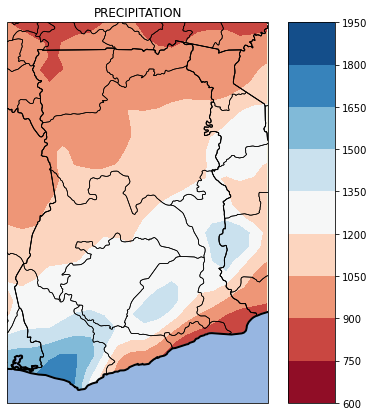

In [9]:
fig=plt.figure(figsize=(7,7))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,linewidth=2,zorder=4)
ax.add_feature(cfeature.LAND,linewidth=0.8,zorder=1)
ax.add_feature(cfeature.STATES,linewidth=0.7,zorder=3)
ax.add_feature(cfeature.BORDERS,linewidth=1,zorder=5)
ax.add_feature(cfeature.OCEAN,linewidth=1.5,zorder=2)
#ax.add_feature(cfeature.LAND,linewidth=1.5,zorder=6)
ax.set_extent([-3.4, 1.4, 4.5, 11.5], crs=ccrs.PlateCarree())
ax.set_title('PRECIPITATION')
cb=ax.contourf(precip.lon, precip.lat, precip[0],cmap='RdBu',
            transform=ccrs.PlateCarree())

plt.colorbar(cb,aspect=8);

In [10]:
maximum_temperature= xr.open_dataset("tmxavgclim.nc")
maximum_temperature

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 10, lat: 16)
Coordinates:
  * time       (time) datetime64[ns] 2016-07-01
  * lon        (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat        (lat) float32 4.25 4.75 5.25 5.75 ... 10.25 10.75 11.25 11.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tmx        (time, lat, lon) float32 ...
    stn        (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Sun Feb 14 17:44:24 2021: cdo yearmean ymmeanclim.nc /home/...
    source:       Run ID = 2004151855. Data generated from:TMX derived from g...
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.04 Maximum Temperature
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    frequency:    year
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [11]:
tmx=maximum_temperature.tmx
tmx

<xarray.DataArray 'tmx' (time: 1, lat: 16, lon: 10)>
array([[[      nan,       nan,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan],
        [      nan, 30.732176, 30.636574, 30.551159, 30.4125  ,       nan,
               nan,       nan,       nan,       nan],
        [30.702778, 31.09213 , 31.067593, 30.742825, 30.324537, 30.592361,
         30.916204,       nan,       nan,       nan],
        [31.026157, 31.222685, 31.448612, 31.182407, 30.992594, 30.986574,
         31.135649, 31.201159, 31.282408,       nan],
        [31.543056, 31.498844, 31.834723, 31.31875 , 31.143982, 31.143288,
         30.730093, 31.865742, 31.291899, 31.21713 ],
        [31.780556, 31.728241, 31.618982, 31.48588 , 31.319214, 31.558334,
         32.052315, 31.955324, 30.452547, 31.532871],
        [32.098843, 31.711575, 31.551157, 31.45463 , 31.972454, 32.343056,
         32.43426 , 32.24514 , 30.849306, 32.092594],
        [32.366436, 31.959953, 31.981018, 31.788889, 32.578472, 32.77523 ,
         32.945835, 32.479168, 31.214584, 32.425   ],
        [32.281715, 32.026157, 32.67801 , 32.948147, 33.056946, 33.234722,
         33.25046 , 32.82986 , 31.599075, 32.709953],
        [32.675694, 32.833797, 32.939354, 33.404167, 33.6375  , 33.567593,
         33.4088  , 33.49167 , 32.62477 , 32.91389 ],
        [33.13704 , 33.300465, 33.154167, 33.60278 , 34.017826, 33.7169  ,
         33.58125 , 33.762962, 33.244213, 32.68403 ],
        [33.452778, 33.79213 , 33.54051 , 33.78866 , 34.450695, 34.19398 ,
         33.77685 , 34.235188, 34.146297, 33.28611 ],
        [33.69676 , 34.024536, 33.69838 , 34.257175, 34.823612, 34.68264 ,
         34.449768, 34.686577, 34.75486 , 33.799538],
        [34.152546, 34.234028, 33.942593, 34.49838 , 34.9206  , 34.809956,
         34.72222 , 34.58727 , 34.978703, 34.484028],
        [34.53472 , 34.674076, 34.419678, 34.44491 , 34.699074, 34.890972,
         34.874306, 34.675926, 35.01088 , 34.774075],
        [34.72616 , 34.925   , 34.70486 , 34.76204 , 34.931946, 35.182873,
         35.092594, 34.880325, 35.05139 , 35.049076]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-07-01
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.25 4.75 5.25 5.75 6.25 ... 10.25 10.75 11.25 11.75
Attributes:
    long_name:                   near-surface temperature maximum
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

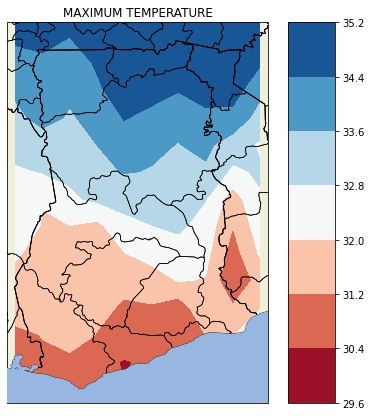

In [12]:
fig=plt.figure(figsize=(7,7))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,linewidth=2,zorder=4)
ax.add_feature(cfeature.LAND,linewidth=0.8,zorder=1)
ax.add_feature(cfeature.STATES,linewidth=0.7,zorder=3)
ax.add_feature(cfeature.BORDERS,linewidth=1,zorder=5)
ax.add_feature(cfeature.OCEAN,linewidth=1.5,zorder=6)
ax.set_extent([-3.4, 1.4, 4.5, 11.5], crs=ccrs.PlateCarree())
ax.set_title('MAXIMUM TEMPERATURE')
cb=ax.contourf(tmx.lon, tmx.lat, tmx[0],cmap='RdBu',
            transform=ccrs.PlateCarree())
plt.colorbar(cb,aspect=8);

In [13]:
minimum_temperature= xr.open_dataset("tmnavgclim.nc")
minimum_temperature

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 10, lat: 16)
Coordinates:
  * time       (time) datetime64[ns] 2016-07-01
  * lon        (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat        (lat) float32 4.25 4.75 5.25 5.75 ... 10.25 10.75 11.25 11.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tmn        (time, lat, lon) float32 ...
    stn        (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Sun Feb 14 17:44:27 2021: cdo yearmean ymmeanclim.nc /home/...
    source:       Run ID = 2004151855. Data generated from:TMN derived from g...
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.04 Minimum Temperature
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    frequency:    year
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [14]:
tmn=minimum_temperature.tmn
tmn

<xarray.DataArray 'tmn' (time: 1, lat: 16, lon: 10)>
array([[[      nan,       nan,       nan,       nan,       nan,       nan,
               nan,       nan,       nan,       nan],
        [      nan, 23.20787 , 23.23287 , 23.250463, 23.177547,       nan,
               nan,       nan,       nan,       nan],
        [23.032177, 23.269445, 23.214352, 23.21389 , 23.345139, 24.285418,
         23.493982,       nan,       nan,       nan],
        [22.741667, 22.714815, 22.92014 , 22.851389, 22.89514 , 23.379168,
         24.390278, 24.321527, 23.489353,       nan],
        [22.586344, 22.435648, 22.668056, 22.366898, 22.262732, 22.288658,
         21.851852, 23.00625 , 23.105093, 23.210648],
        [22.313194, 22.346296, 22.271065, 22.215046, 22.035881, 22.17037 ,
         22.537731, 22.459028, 21.386574, 22.34375 ],
        [22.247684, 22.077778, 22.077778, 21.928473, 22.395834, 22.663658,
         22.728935, 22.463196, 21.087038, 22.270603],
        [22.179861, 22.000463, 22.174538, 21.931019, 22.66227 , 22.862963,
         23.086344, 22.48611 , 20.986805, 22.057407],
        [21.771065, 21.697454, 22.419445, 22.69676 , 22.794909, 22.949768,
         22.939121, 22.338427, 20.848612, 21.7625  ],
        [21.820833, 22.075462, 22.27014 , 22.75301 , 22.976389, 22.853935,
         22.588196, 22.470139, 21.315973, 21.449306],
        [21.978935, 22.2669  , 22.15602 , 22.612038, 22.972454, 22.597918,
         22.354399, 22.33889 , 21.595602, 20.912037],
        [22.028934, 22.504862, 22.322454, 22.486574, 23.06551 , 22.71713 ,
         22.150463, 22.43449 , 22.24514 , 21.38403 ],
        [21.931944, 22.423843, 22.172916, 22.644213, 23.101852, 22.834723,
         22.473843, 22.496296, 22.56088 , 21.681713],
        [22.080788, 22.222223, 21.970602, 22.506714, 22.896759, 22.654167,
         22.431019, 22.203241, 22.663658, 22.327314],
        [22.131945, 22.283333, 22.053473, 22.083565, 22.313427, 22.428009,
         22.3294  , 22.125463, 22.493519, 22.371065],
        [21.981018, 22.15301 , 21.990509, 22.072918, 22.209492, 22.385649,
         22.242361, 22.025002, 22.228935, 22.289583]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2016-07-01
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.25 4.75 5.25 5.75 6.25 ... 10.25 10.75 11.25 11.75
Attributes:
    long_name:                   near-surface temperature minimum
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

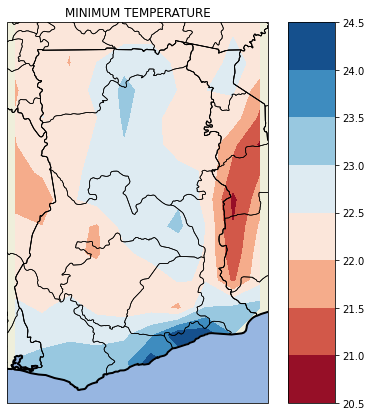

In [15]:
fig=plt.figure(figsize=(7,7))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,linewidth=2,zorder=4)
ax.add_feature(cfeature.LAND,linewidth=0.8,zorder=1)
ax.add_feature(cfeature.STATES,linewidth=0.7,zorder=3)
ax.add_feature(cfeature.BORDERS,linewidth=1,zorder=5)
ax.add_feature(cfeature.OCEAN,linewidth=1.5,zorder=2)
ax.set_title('MINIMUM TEMPERATURE')
ax.set_extent([-3.4, 1.4, 4.5, 11.5], crs=ccrs.PlateCarree())
cb=ax.contourf(tmn.lon, tmn.lat, tmn[0],cmap='RdBu',
            transform=ccrs.PlateCarree())

plt.colorbar(cb,aspect=8);

PLOTTING FOR ALL

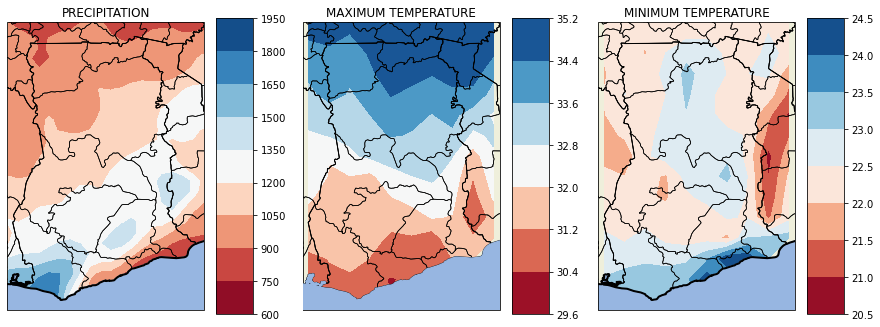

In [16]:
fig=plt.figure(figsize=(15,15))
ax = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,linewidth=2,zorder=4)
ax.add_feature(cfeature.LAND,linewidth=0.8,zorder=1)
ax.add_feature(cfeature.STATES,linewidth=0.7,zorder=3)
ax.add_feature(cfeature.BORDERS,linewidth=1,zorder=5)
ax.add_feature(cfeature.OCEAN,linewidth=1.5,zorder=2)
#ax.add_feature(cfeature.LAND,linewidth=1.5,zorder=6)
ax.set_extent([-3.4, 1.4, 4.5, 11.5], crs=ccrs.PlateCarree())
ax.set_title('PRECIPITATION')
cb=ax.contourf(precip.lon, precip.lat, precip[0],cmap='RdBu',
            transform=ccrs.PlateCarree())
plt.colorbar(cb,aspect=8);



ax = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,linewidth=2,zorder=4)
ax.add_feature(cfeature.LAND,linewidth=0.8,zorder=1)
ax.add_feature(cfeature.STATES,linewidth=0.7,zorder=3)
ax.add_feature(cfeature.BORDERS,linewidth=1,zorder=5)
ax.add_feature(cfeature.OCEAN,linewidth=1.5,zorder=6)
ax.set_extent([-3.4, 1.4, 4.5, 11.5], crs=ccrs.PlateCarree())
ax.set_title('MAXIMUM TEMPERATURE')
cb=ax.contourf(tmx.lon, tmx.lat, tmx[0],cmap='RdBu',
            transform=ccrs.PlateCarree())
plt.colorbar(cb,aspect=8);



ax = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,linewidth=2,zorder=4)
ax.add_feature(cfeature.LAND,linewidth=0.8,zorder=1)
ax.add_feature(cfeature.STATES,linewidth=0.7,zorder=3)
ax.add_feature(cfeature.BORDERS,linewidth=1,zorder=5)
ax.add_feature(cfeature.OCEAN,linewidth=1.5,zorder=2)
ax.set_title('MINIMUM TEMPERATURE')
ax.set_extent([-3.4, 1.4, 4.5, 11.5], crs=ccrs.PlateCarree())
cb=ax.contourf(tmn.lon, tmn.lat, tmn[0],cmap='RdBu',
            transform=ccrs.PlateCarree())
plt.colorbar(cb,aspect=8);


In [17]:
all_data=[precip,tmx,tmn]
data_names=('PRECIPITATION','MAXIMUM TEMPERATURE','MINIMUM TEMPERATURE')
data_names

('PRECIPITATION', 'MAXIMUM TEMPERATURE', 'MINIMUM TEMPERATURE')

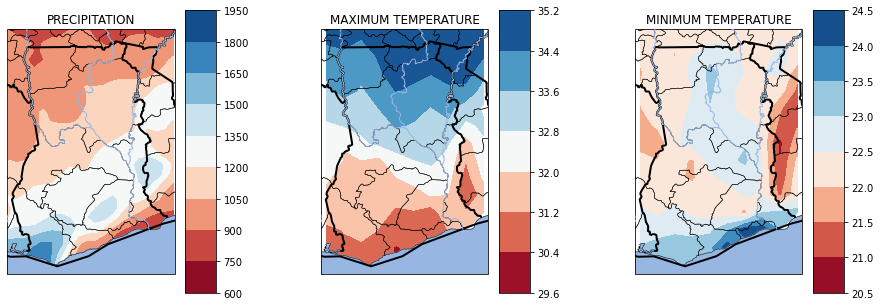

In [18]:
fig,ax=plt.subplots(1,3,  figsize=(15,15),subplot_kw={'projection':ccrs.PlateCarree()})
ax=ax.flatten()
for i in range(3):
    cb=ax[i].contourf(all_data[i].lon, all_data[i].lat, all_data[i][0],cmap='RdBu',transform=ccrs.PlateCarree())
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=2,zorder=4)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2, zorder=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5, zorder=3)
    ax[i].add_feature(cfeature.OCEAN,zorder=1)
    ax[i].add_feature(cfeature.RIVERS,zorder=5)
    ax[i].set_extent([-3.4,1.4,4.5,11.5])
    ax[i].set_title(data_names[i])
    fig.colorbar(cb,ax=ax[i],aspect=9)
plt.subplots_adjust(wspace=0.5)    

In [19]:
minimum_temperature= xr.open_dataset("tmnavgclim.nc")
minimum_temperature

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 10, lat: 16)
Coordinates:
  * time       (time) datetime64[ns] 2016-07-01
  * lon        (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat        (lat) float32 4.25 4.75 5.25 5.75 ... 10.25 10.75 11.25 11.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tmn        (time, lat, lon) float32 ...
    stn        (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Sun Feb 14 17:44:27 2021: cdo yearmean ymmeanclim.nc /home/...
    source:       Run ID = 2004151855. Data generated from:TMN derived from g...
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.04 Minimum Temperature
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    frequency:    year
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [20]:
stn=minimum_temperature.stn
stn

<xarray.DataArray 'stn' (time: 1, lat: 16, lon: 10)>
array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan,  5.,  5.,  4.,  4., nan, nan, nan, nan, nan],
        [ 5.,  5.,  5.,  5.,  6.,  4.,  4., nan, nan, nan],
        [ 5.,  6.,  6.,  6.,  6.,  6.,  6.,  5.,  5., nan],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
        [ 6.,  6.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.],
        [ 7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 7.,  8.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.]]])
Coordinates:
  * time     (time) datetime64[ns] 2016-07-01
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.25 4.75 5.25 5.75 6.25 ... 10.25 10.75 11.25 11.75
Attributes:
    description:  number of stations contributing to each datum

In [21]:
stn.values

array([[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan,  5.,  5.,  4.,  4., nan, nan, nan, nan, nan],
        [ 5.,  5.,  5.,  5.,  6.,  4.,  4., nan, nan, nan],
        [ 5.,  6.,  6.,  6.,  6.,  6.,  6.,  5.,  5., nan],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
        [ 6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
        [ 6.,  6.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.],
        [ 7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
        [ 7.,  8.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.]]])

In [22]:
stn.coords

Coordinates:
  * time     (time) datetime64[ns] 2016-07-01
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.25 4.75 5.25 5.75 6.25 ... 10.25 10.75 11.25 11.75

In [23]:
stn.dims

('time', 'lat', 'lon')

In [24]:
stn.shape

(1, 16, 10)

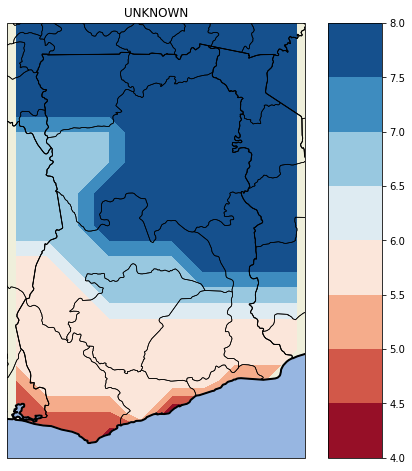

In [25]:
#fig=plt.figure(figsize=(7,7))
#ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())






fig=plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree() )
ax.add_feature(cfeature.COASTLINE,linewidth=2,zorder=4)
ax.add_feature(cfeature.LAND,linewidth=0.8,zorder=1)
ax.add_feature(cfeature.STATES,linewidth=0.7,zorder=3)
ax.add_feature(cfeature.BORDERS,linewidth=1,zorder=5)
ax.add_feature(cfeature.OCEAN,linewidth=1.5,zorder=2)
ax.set_title('UNKNOWN')
ax.set_extent([-3.4, 1.4, 4.5, 11.5], crs=ccrs.PlateCarree())
cb=ax.contourf(stn.lon, stn.lat, stn[0],cmap='RdBu',
            transform=ccrs.PlateCarree())

plt.colorbar(cb,aspect=8);

In [26]:
data=pd.read_excel('Data.xlsx')
data

,YEAR,MONTH,GAUGE DATA,SATELLITE DATA
0,1998.0,1.0,20.903946,12.799863
1,1998.0,2.0,27.162743,25.698927
2,1998.0,3.0,28.503807,20.155447
3,1998.0,4.0,94.114746,110.638329
4,1998.0,5.0,121.339172,142.182053
...,...,...,...,...
175,2012.0,8.0,77.245155,141.330063
176,2012.0,9.0,168.770508,172.583878
177,2012.0,10.0,142.981079,111.247154
178,2012.0,11.0,42.880787,50.230442


In [27]:
data.MONTH[12:24]

12     1.0
13     2.0
14     3.0
15     4.0
16     5.0
17     6.0
18     7.0
19     8.0
20     9.0
21    10.0
22    11.0
23    12.0
Name: MONTH, dtype: float64

Text(0.5, 0, 'months')

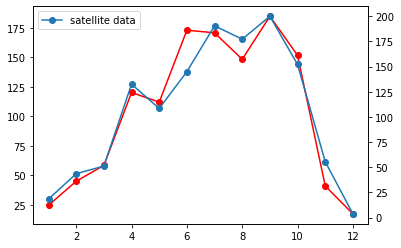

In [28]:
month=data.MONTH[12:24]
gd=data['GAUGE DATA '][12:24]
sd=data['SATELLITE DATA'][12:24]

plt.plot(month,gd,marker='o',label='gauge data',color='r')
plt.twinx()
plt.plot(month,sd,marker='o',label='satellite data')
plt.legend()
plt.xlabel('months')

In [29]:
ds=pd.read_csv('car-sales.csv')
ds

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [30]:
d=xr.open_dataset('sst.mnmean.nc')
d

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 128)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

In [31]:
d.dims

Frozen({'lat': 89, 'lon': 180, 'time': 128})

In [32]:
d.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 128)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                 

In [33]:
sst=d.sst
sst

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
[2050560 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

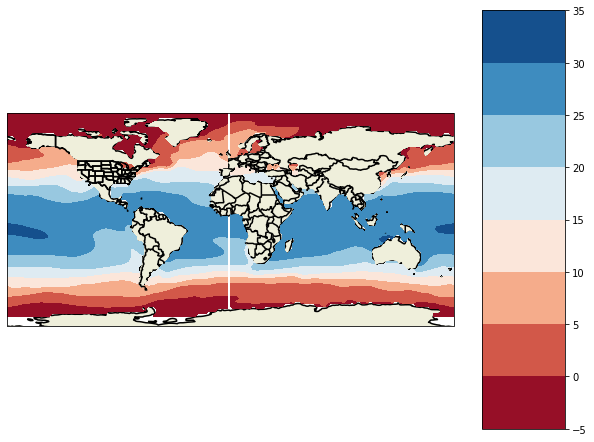

In [34]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,linewidth=1.5)
ax.add_feature(cfeature.BORDERS,linewidth=1.5,zorder=2)
ax.add_feature(cfeature.STATES,linewidth=1.5,zorder=1)
ax.add_feature(cfeature.LAND,linewidth=1.5)
#ax.set_extent([-3.4, 1.4, 4.5, 11.5], crs=ccrs.PlateCarree())
cb=ax.contourf(sst.lon, sst.lat, sst[0], cmap='RdBu',
           transform=ccrs.PlateCarree())
plt.colorbar(cb,aspect='5');



In [35]:
import pandas as pd

In [36]:
v=pd.read_excel('Data.xlsx')
v

,YEAR,MONTH,GAUGE DATA,SATELLITE DATA
0,1998.0,1.0,20.903946,12.799863
1,1998.0,2.0,27.162743,25.698927
2,1998.0,3.0,28.503807,20.155447
3,1998.0,4.0,94.114746,110.638329
4,1998.0,5.0,121.339172,142.182053
...,...,...,...,...
175,2012.0,8.0,77.245155,141.330063
176,2012.0,9.0,168.770508,172.583878
177,2012.0,10.0,142.981079,111.247154
178,2012.0,11.0,42.880787,50.230442


In [37]:
a=v[v['YEAR']==2000]
a

,YEAR,MONTH,GAUGE DATA,SATELLITE DATA
24,2000.0,1.0,35.072559,16.304209
25,2000.0,2.0,15.144871,6.245264
26,2000.0,3.0,49.737408,57.861607
27,2000.0,4.0,95.977959,118.029701
28,2000.0,5.0,127.628151,135.199814
29,2000.0,6.0,202.719559,168.975998
30,2000.0,7.0,132.480835,129.058853
31,2000.0,8.0,129.781754,144.838150
32,2000.0,9.0,174.841248,159.618912
33,2000.0,10.0,80.610344,93.246094


In [38]:
import matplotlib.pyplot as plt
import numpy as np

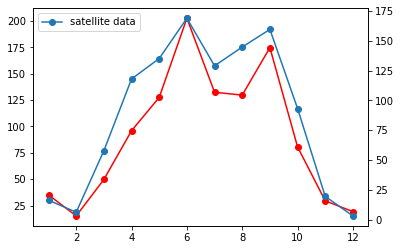

In [43]:
m=a.MONTH
gd=a['GAUGE DATA ']
sd=a['SATELLITE DATA']
#plt.plot(month, gauge_data)
#plt.plot(month, satellite_data)
plt.plot(m, gd, marker ='o',label='gauge data',color='r')
plt.twinx()
plt.plot(m, sd, marker ='o',label='satellite data')
plt.legend()
plt.xlabel('months');

In [40]:
m

24     1.0
25     2.0
26     3.0
27     4.0
28     5.0
29     6.0
30     7.0
31     8.0
32     9.0
33    10.0
34    11.0
35    12.0
Name: MONTH, dtype: float64

In [41]:
gd

24     35.072559
25     15.144871
26     49.737408
27     95.977959
28    127.628151
29    202.719559
30    132.480835
31    129.781754
32    174.841248
33     80.610344
34     29.478745
35     19.226868
Name: GAUGE DATA , dtype: float64

In [42]:
sd

24     16.304209
25      6.245264
26     57.861607
27    118.029701
28    135.199814
29    168.975998
30    129.058853
31    144.838150
32    159.618912
33     93.246094
34     19.526628
35      3.140524
Name: SATELLITE DATA, dtype: float64

In [6]:
course= 'Python programming'
print(course.upper())

PYTHON PROGRAMMING


In [7]:
print(course.lower())

python programming


In [10]:
print('gra' in course )

True


In [11]:
type(course)

str